In [1]:
!pip install tensorflow==2.9.1
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatb

In [2]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


## downloading the dataset

In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#we are downloading the dataset from kaggle

import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dohametwallysalah
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [01:16<00:00, 37.7MB/s]


In [6]:
import os

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,1961 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories,1888 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot
There are 0 directories,1702 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot
There are 0 directories,1907 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_
There are 0 directories,1827 images in /content/new-plant-diseases-dataset/New Plant Disease

In [7]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,490 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directories,472 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Grape___Black_rot
There are 0 directories,425 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot
There are 0 directories,477 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_
There are 0 directories,457 images in /content/new-plant-diseases-dataset/New Plant Diseases Data

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data =keras.utils.image_dataset_from_directory(train_dir ,
                                         image_size=(224, 224))
valid_data = keras.utils.image_dataset_from_directory(test_dir,
                                        image_size=(224, 224))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [12]:
train_data,valid_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [13]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [14]:
diseases = os.listdir(train_dir)
print(diseases)
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print("======================================================================")
print(f'Number of different types of plants in our dataset is {str(len(plants))}')
print(f'Total number of Diseases in our dataset are {NumberOfDiseases}')

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Black_rot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Tomato___Target_Spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___healthy', 'Tomato___healthy', 'Apple___Apple_scab', 'Peach___healthy', 'Potato___Early_blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch', 'Potato___healthy', 'Tomato___Tomato_mosaic_virus', 'Apple___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Squash___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___healthy', 'Grape___healthy', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Tomato___Leaf_Mold', 'Raspberry___healthy', 'Blueberry___healthy', 'Pepper,_bell___Bacterial_spot', 'Tomato___Late_blight'

In [15]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Tomato', 'Grape', 'Corn_(maize)', 'Cherry_(including_sour)', 'Apple', 'Peach', 'Potato', 'Strawberry', 'Orange', 'Squash', 'Pepper,_bell', 'Raspberry', 'Blueberry', 'Soybean']


In [16]:
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(test_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Grape___Black_rot                                            1888
Tomato___Bacterial_spot                                      1702
Corn_(maize)___Common_rust_                                  1907
Tomato___Target_Spot                                         1827
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Cherry_(including_sour)___healthy                            1826
Tomato___healthy                                             1926
Apple___Apple_scab                                           2016
Peach___healthy                                              1728
Potato___Early_blight                                        1939
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Strawberry___healthy                                         1824
Grape___Esca_(Black_Measles)                                 1920
Strawberry___Leaf_scorch                                     1774
Potato___healthy                                             1824
Tomato___Tomato_mosaic_virus                                 1790
Apple___Black_rot                                            1987
Tomato___Spider_mites Two-spotted_spider_mite                1741
Orange___Haunglongbing_(Citrus_greening)                     2010
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Squash___Powdery_mildew                                      1736
Tomato___Septoria_leaf_spot                                  1745
Pepper,_bell___healthy                                       1988
Grape___healthy                                              1692
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Tomato___Leaf_Mold                                           1882
Raspberry___healthy                                          1781
Blueberry___healthy                                          1816
Pepper,_bell___Bacterial_spot                                1913
Tomato___Late_blight                                         1851
Corn_(maize)___healthy                                       1859
Soybean___healthy                                            2022
Peach___Bacterial_spot                                       1838
Potato___Late_blight                                         1939

<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

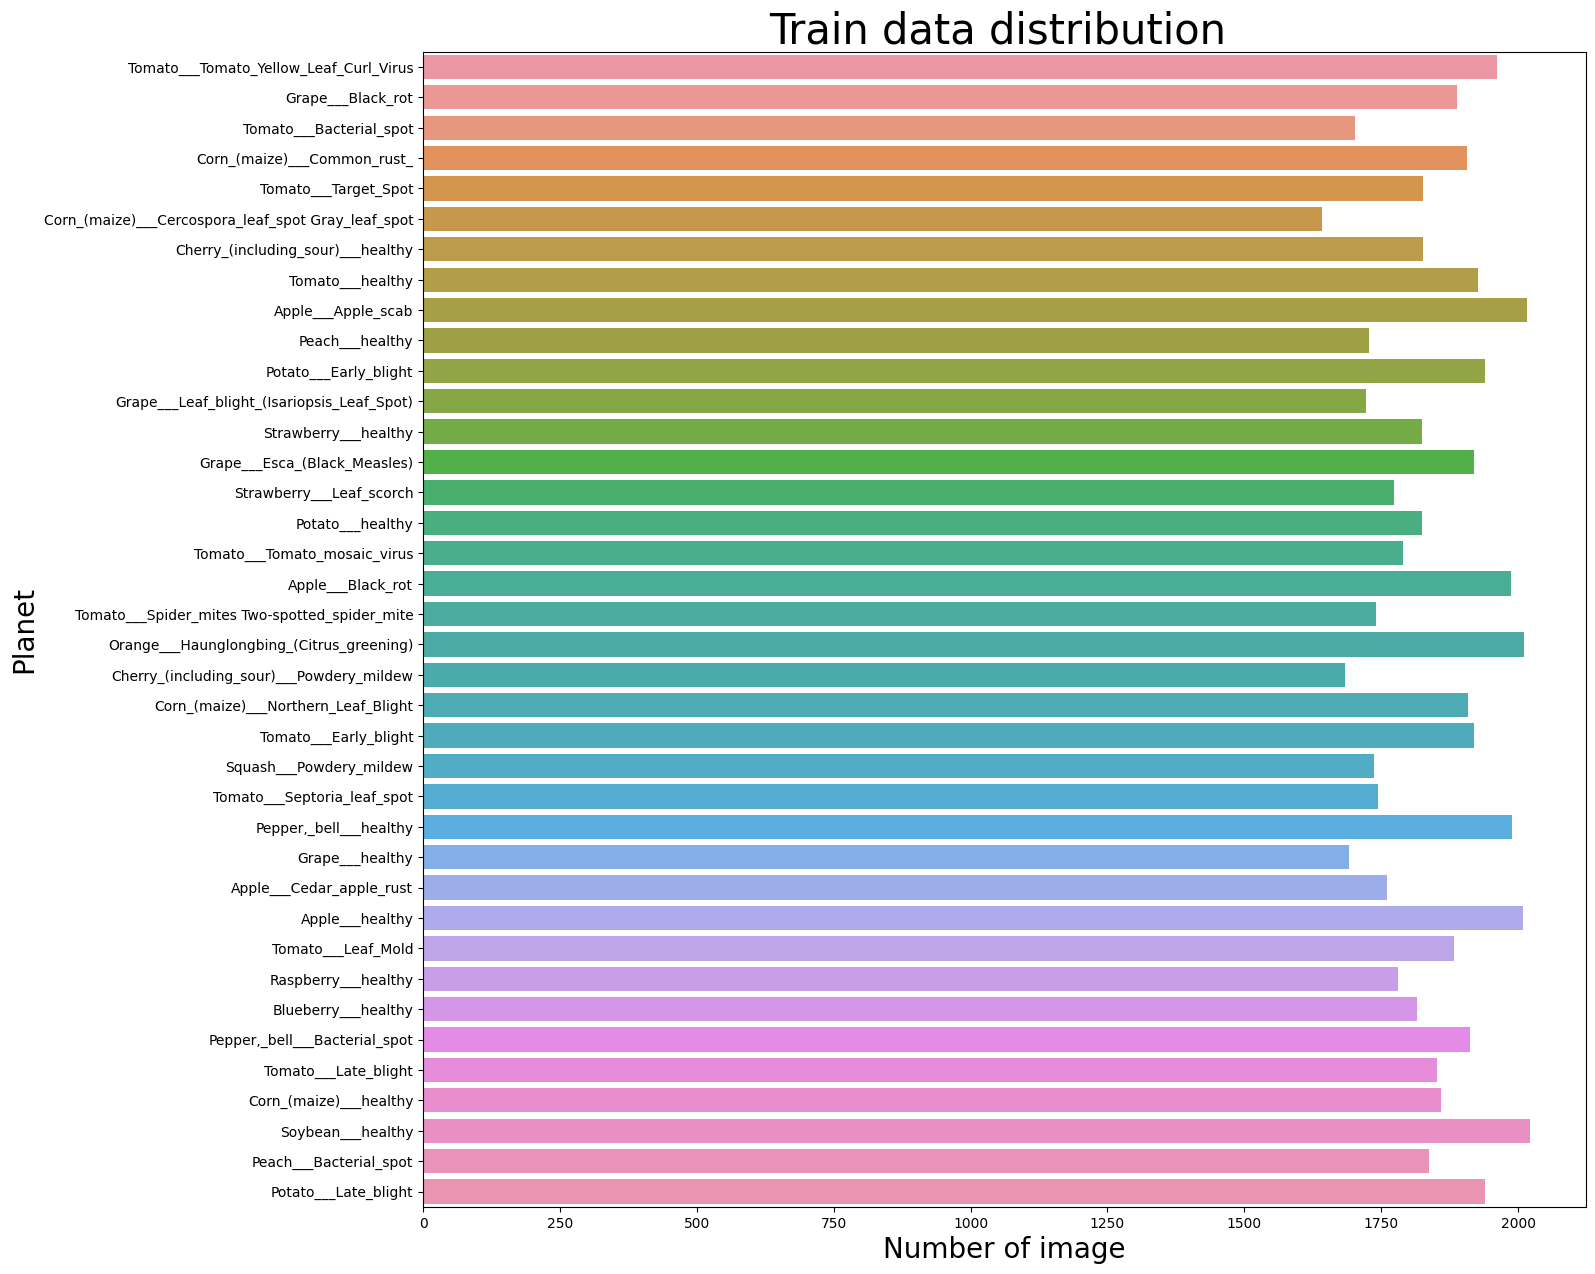

In [18]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_train.keys())

vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

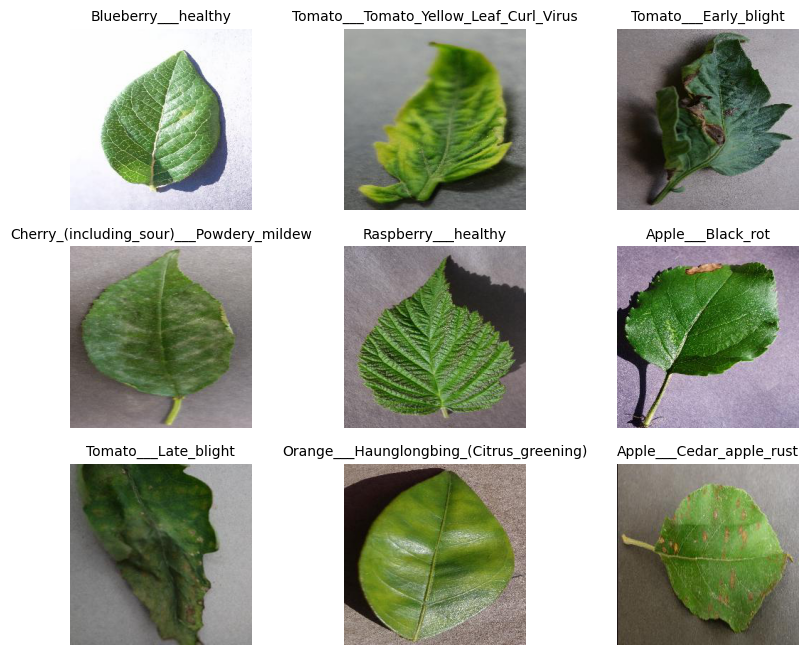

In [20]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

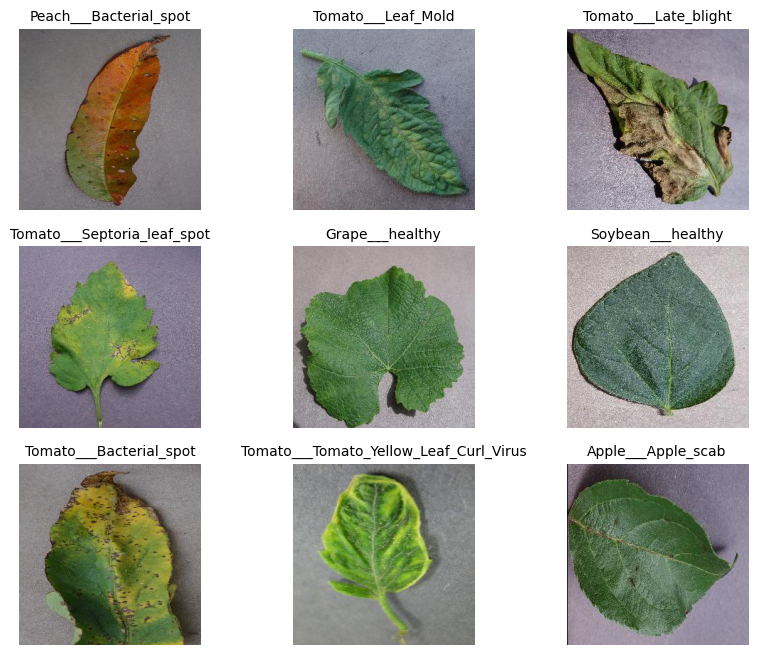

In [21]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(test_dir)

In [22]:
rescale = keras.layers.Rescaling(scale=1.0/255)


In [23]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))


In [24]:
model_1 = keras.models.Sequential()

model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))

model_1.add(keras.layers.Dropout(0.1))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(64, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.15))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Conv2D(128, 3, activation='relu'))
model_1.add(keras.layers.Dropout(0.2))
model_1.add(keras.layers.MaxPooling2D())

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(256, activation='relu'))
model_1.add(keras.layers.Dense(38, activation='softmax'))

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 dropout (Dropout)           (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [25]:
history = model_1.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

<ipython-input-25-a06cfbdb2b30>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_1.fit_generator(train_gen,


Epoch 1/10
2197/2197 [==============================] - 233s 101ms/step - loss: 0.8964 - accuracy: 0.7361 - val_loss: 0.4508 - val_accuracy: 0.8689
Epoch 2/10
2197/2197 [==============================] - 212s 96ms/step - loss: 0.2534 - accuracy: 0.9173 - val_loss: 0.2904 - val_accuracy: 0.9091
Epoch 3/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.1505 - accuracy: 0.9499 - val_loss: 0.3894 - val_accuracy: 0.8775
Epoch 4/10
2197/2197 [==============================] - 211s 96ms/step - loss: 0.1079 - accuracy: 0.9656 - val_loss: 0.2676 - val_accuracy: 0.9177
Epoch 5/10
2197/2197 [==============================] - 212s 96ms/step - loss: 0.0893 - accuracy: 0.9712 - val_loss: 0.2812 - val_accuracy: 0.9195
Epoch 6/10
2197/2197 [==============================] - 213s 97ms/step - loss: 0.0770 - accuracy: 0.9756 - val_loss: 0.6308 - val_accuracy: 0.8397
Epoch 7/10
2197/2197 [==============================] - 212s 96ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss:

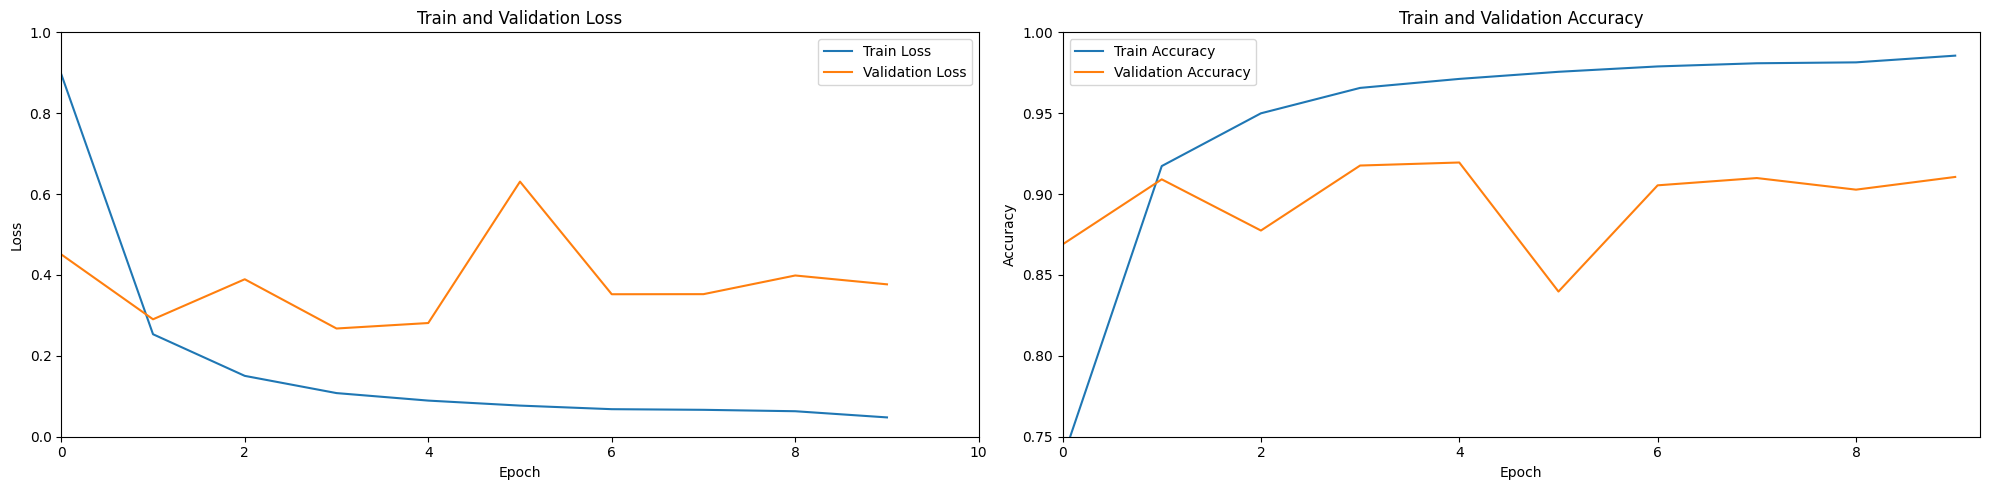

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [27]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_1.predict(x),1).numpy())

1/1 [==============================] - 0s 82ms/step


In [28]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [29]:
print("Loss Function   : {:.4f}".format(history.history['loss'][-1]))
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Loss Function   : 0.0478
Train Accuracy  : 98.56 %
Test Accuracy   : 91.06 %
Precision Score : 91.06 %
Recall Score    : 91.06 %


## Model_2

In [62]:
model_2 = keras.Sequential()

model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model_2.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.MaxPooling2D(3,3))

model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_2.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_2.add(keras.layers.Flatten())

model_2.add(keras.layers.Dense(1568,activation="relu"))
model_2.add(keras.layers.Dropout(0.5))

model_2.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_2.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_67 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                

In [31]:
history = model_2.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10)

Epoch 1/10


<ipython-input-31-21bf19100c99>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_2.fit_generator(train_gen,


2197/2197 [==============================] - 322s 145ms/step - loss: 1.6826 - accuracy: 0.5081 - val_loss: 0.6420 - val_accuracy: 0.7947
Epoch 2/10
2197/2197 [==============================] - 332s 151ms/step - loss: 0.4855 - accuracy: 0.8443 - val_loss: 0.3304 - val_accuracy: 0.8916
Epoch 3/10
2197/2197 [==============================] - 332s 151ms/step - loss: 0.2960 - accuracy: 0.9021 - val_loss: 0.3123 - val_accuracy: 0.8969
Epoch 4/10
2197/2197 [==============================] - 322s 146ms/step - loss: 0.1994 - accuracy: 0.9333 - val_loss: 0.2115 - val_accuracy: 0.9305
Epoch 5/10
2197/2197 [==============================] - 322s 146ms/step - loss: 0.1421 - accuracy: 0.9516 - val_loss: 0.1561 - val_accuracy: 0.9494
Epoch 6/10
2197/2197 [==============================] - 320s 146ms/step - loss: 0.1151 - accuracy: 0.9611 - val_loss: 0.1490 - val_accuracy: 0.9513
Epoch 7/10
2197/2197 [==============================] - 316s 144ms/step - loss: 0.0898 - accuracy: 0.9698 - val_loss: 0.185

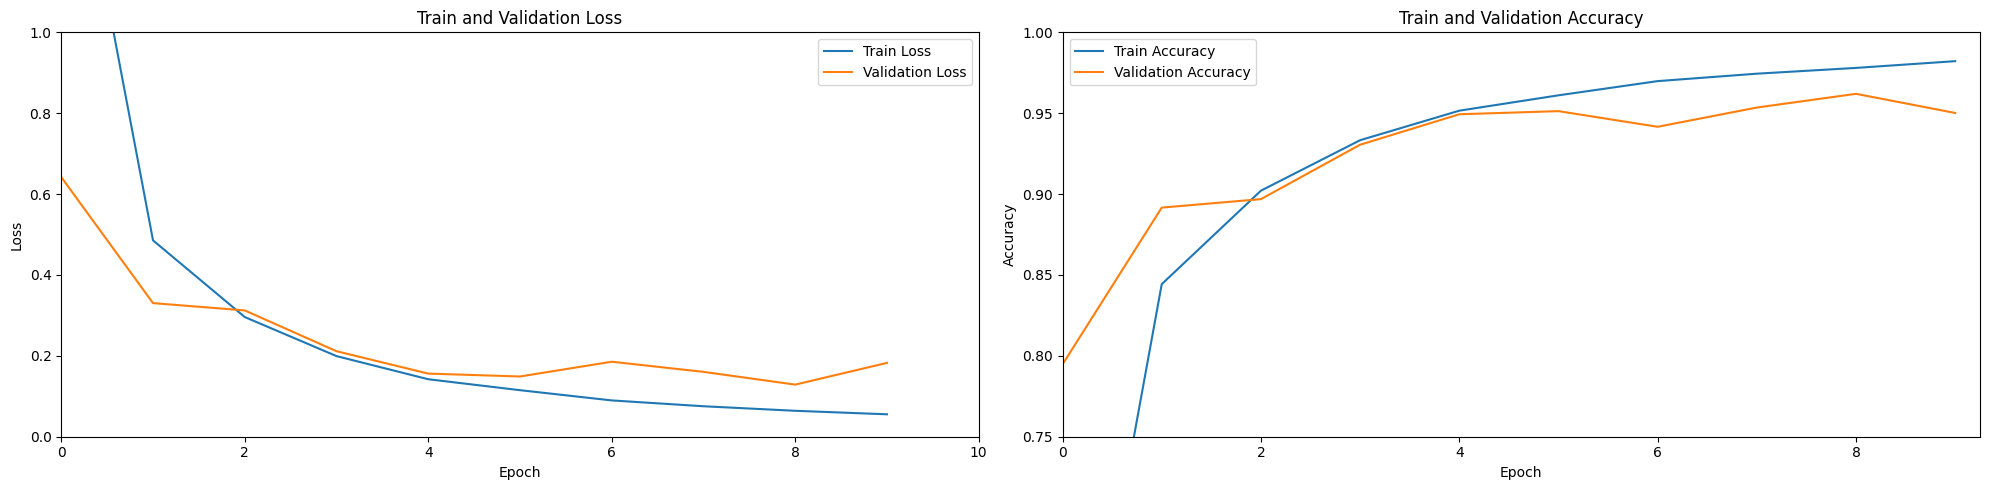

In [32]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [33]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model_2.predict(x),1).numpy())

1/1 [==============================] - 0s 172ms/step


In [34]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))


In [35]:
print("Loss Function   : {:.4f}".format(history.history['loss'][-1]))
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Loss Function   : 0.0555
Train Accuracy  : 98.22 %
Test Accuracy   : 95.01 %
Precision Score : 95.01 %
Recall Score    : 95.01 %


## VGG16

In [52]:
train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

valid_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [51]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create the model architecture
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(38, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_22 (Dense)            (None, 256)               6422784   
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 38)                9766      
                                                                 
Total params: 21,213,030
Trainable params: 6,498,342
Non-trainable params: 14,714,688
_________________________________________________________________


In [53]:
# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


Epoch 1/10
2197/2197 [==============================] - 511s 231ms/step - loss: 0.8167 - accuracy: 0.8392 - val_loss: 0.4044 - val_accuracy: 0.8919
Epoch 2/10
2197/2197 [==============================] - 457s 208ms/step - loss: 0.2349 - accuracy: 0.9368 - val_loss: 0.3015 - val_accuracy: 0.9262
Epoch 3/10
2197/2197 [==============================] - 454s 207ms/step - loss: 0.1904 - accuracy: 0.9510 - val_loss: 0.2933 - val_accuracy: 0.9277
Epoch 4/10
2197/2197 [==============================] - 456s 207ms/step - loss: 0.1477 - accuracy: 0.9622 - val_loss: 0.3787 - val_accuracy: 0.9305
Epoch 5/10
2197/2197 [==============================] - 458s 208ms/step - loss: 0.1273 - accuracy: 0.9692 - val_loss: 0.4113 - val_accuracy: 0.9313
Epoch 6/10
2197/2197 [==============================] - 457s 208ms/step - loss: 0.1215 - accuracy: 0.9730 - val_loss: 0.3513 - val_accuracy: 0.9467
Epoch 7/10
2197/2197 [==============================] - 458s 208ms/step - loss: 0.1083 - accuracy: 0.9783 - val_

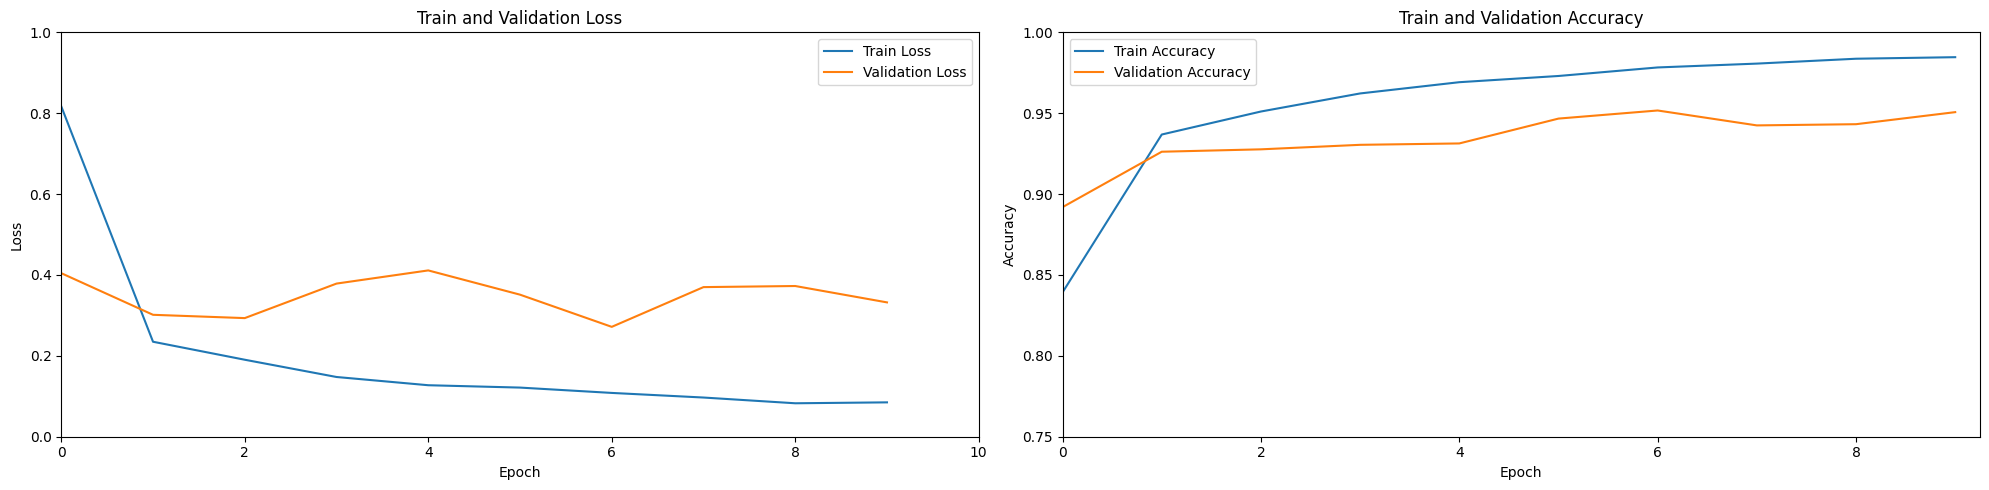

In [54]:
# Train the model and obtain the history
history = model.fit(train_data, validation_data=valid_data, epochs=10)

# Plot the training history
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
y_true = []
y_pred = []

for images, labels in valid_data:
    predictions = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())


1/1 [==============================] - 0s 22ms/step


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Loss Function   : {:.4f}".format(history.history['loss'][-1]))
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1] * 100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_true, y_pred) * 100))
print("Precision Score : {:.2f} %".format(precision_score(y_true, y_pred, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(y_true, y_pred, average='micro') * 100))


Loss Function   : 0.0850
Train Accuracy  : 98.46 %
Test Accuracy   : 95.07 %
Precision Score : 95.07 %
Recall Score    : 95.07 %


## ResNet

In [78]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.ResNet50(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')



In [79]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [80]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_14[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [81]:
feature_model.summary()


Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 GlobalAveragePooling2D_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                77862     
                                                                 
Total params: 23,665,574
Trainable params: 9,009,190
Non-trainable params: 14,656,384
_________________________________________________________________


In [82]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [83]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"


model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")


In [84]:
initial_epochs = 7

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'ResNet50')])


Saving TensorBoard log files to: plant_disease_model/ResNet50/20230624-183338
Epoch 1/7
2197/2197 [==============================] - 345s 154ms/step - loss: 0.1690 - accuracy: 0.9471 - val_loss: 0.0521 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 2/7
2197/2197 [==============================] - 338s 154ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0474 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 3/7
2197/2197 [==============================] - 338s 154ms/step - loss: 0.0322 - accuracy: 0.9892 - val_loss: 0.0411 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 4/7
2197/2197 [==============================] - 333s 151ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0302 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/7
2197/2197 [==============================] - 331s 151ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0348 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 6/7
2197/2197 [==============================] - 332s 151ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.025

In [85]:
feature_model.load_weights(checkpoint_path)


In [86]:
feature_model.evaluate(valid_data)


550/550 [==============================] - 58s 104ms/step - loss: 0.0253 - accuracy: 0.9927


[0.02534281276166439, 0.992658793926239]

In [87]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')


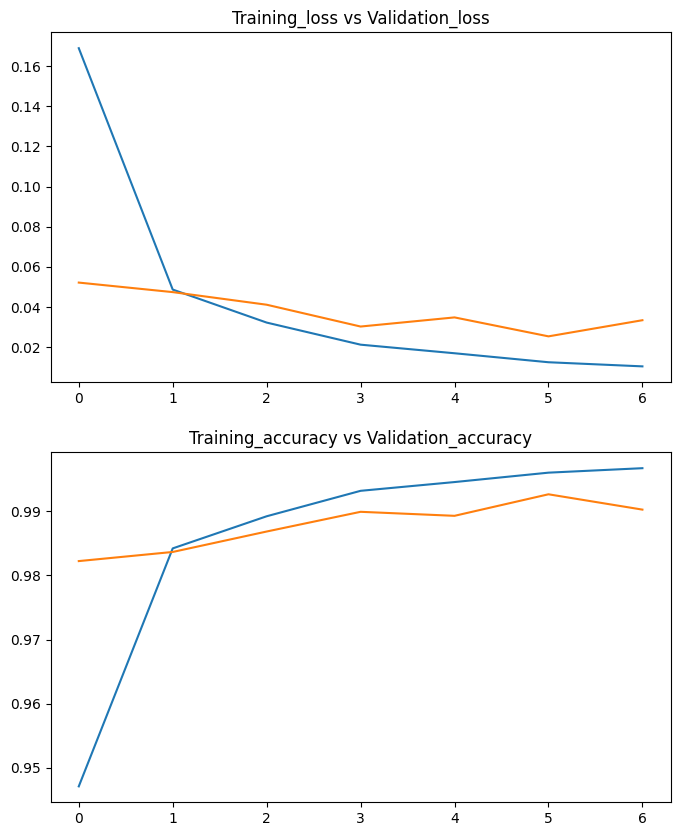

In [88]:
plot_history(history1)


In [89]:
y_true = []
y_pred = []

for images, labels in valid_data:
    predictions = feature_model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())



1/1 [==============================] - 1s 1s/step


In [90]:
precision = precision_score(y_true, y_pred, average='micro') * 100
recall = recall_score(y_true, y_pred, average='micro') * 100
loss, test_accuracy = feature_model.evaluate(valid_data)

print("Precision Score : {:.2f} %".format(precision))
print("Recall Score    : {:.2f} %".format(recall))
print("Loss Function   : {:.4f}".format(loss))


550/550 [==============================] - 59s 106ms/step - loss: 0.0253 - accuracy: 0.9927
Precision Score : 99.27 %
Recall Score    : 99.27 %
Loss Function   : 0.0253


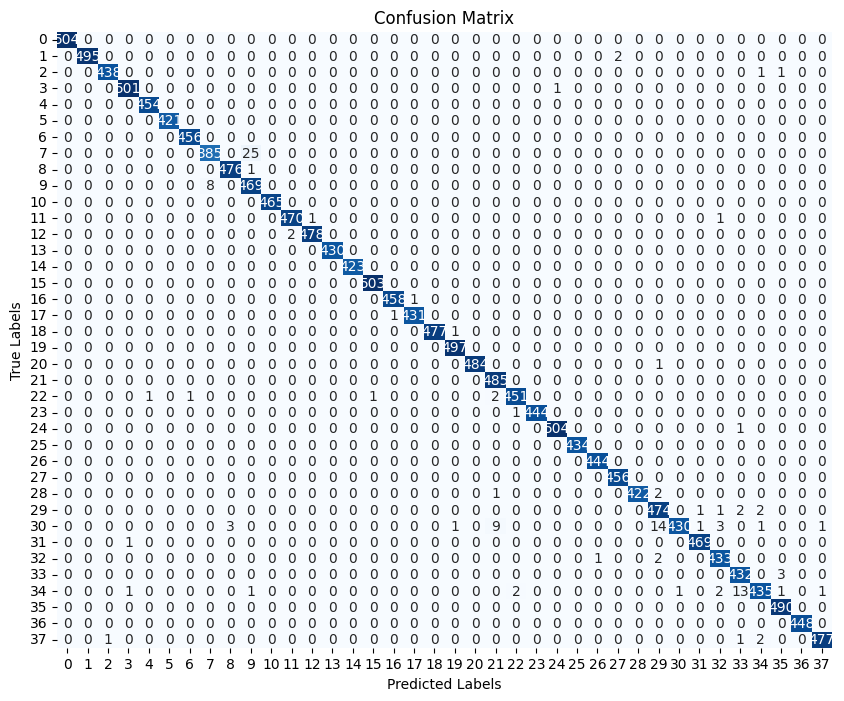

In [91]:
confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
feature_model.save('best_plant_model.h5')

In [93]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

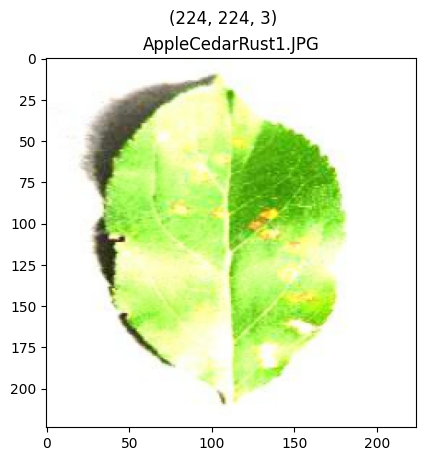

In [94]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [95]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred


1/1 [==============================] - 0s 441ms/step


array([[8.9387148e-10, 7.8452758e-11, 9.9999964e-01, 1.7475570e-09,
        6.3841618e-08, 6.4113363e-12, 4.3070352e-09, 1.0937178e-10,
        1.6889466e-07, 8.2696996e-15, 5.0488735e-11, 3.7502280e-12,
        2.1132206e-10, 1.5867779e-12, 4.1492328e-08, 3.1498996e-12,
        6.9874477e-13, 3.0218453e-10, 6.2320442e-14, 2.7107080e-10,
        1.4682911e-12, 1.4099619e-15, 1.2245507e-10, 7.7028731e-11,
        3.9071550e-12, 4.4544340e-15, 3.5929473e-10, 4.3352483e-12,
        2.0689433e-17, 3.6493489e-13, 3.3905090e-10, 2.4664742e-15,
        1.3392971e-14, 1.5955508e-17, 1.4879228e-10, 2.7583139e-11,
        2.4848263e-13, 7.2051670e-10]], dtype=float32)

In [96]:
predicted_value = class_names[pred.argmax()]
predicted_value

'Apple___Cedar_apple_rust'

In [108]:
class_names = valid_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))

  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 51ms/step


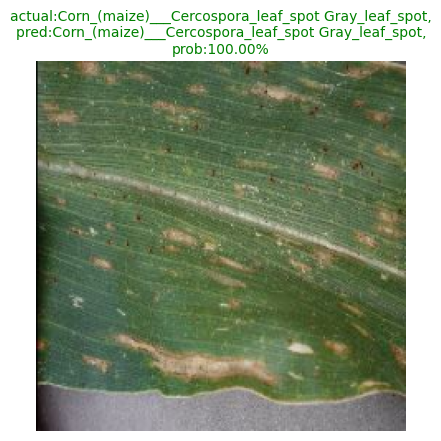

In [109]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 43ms/step


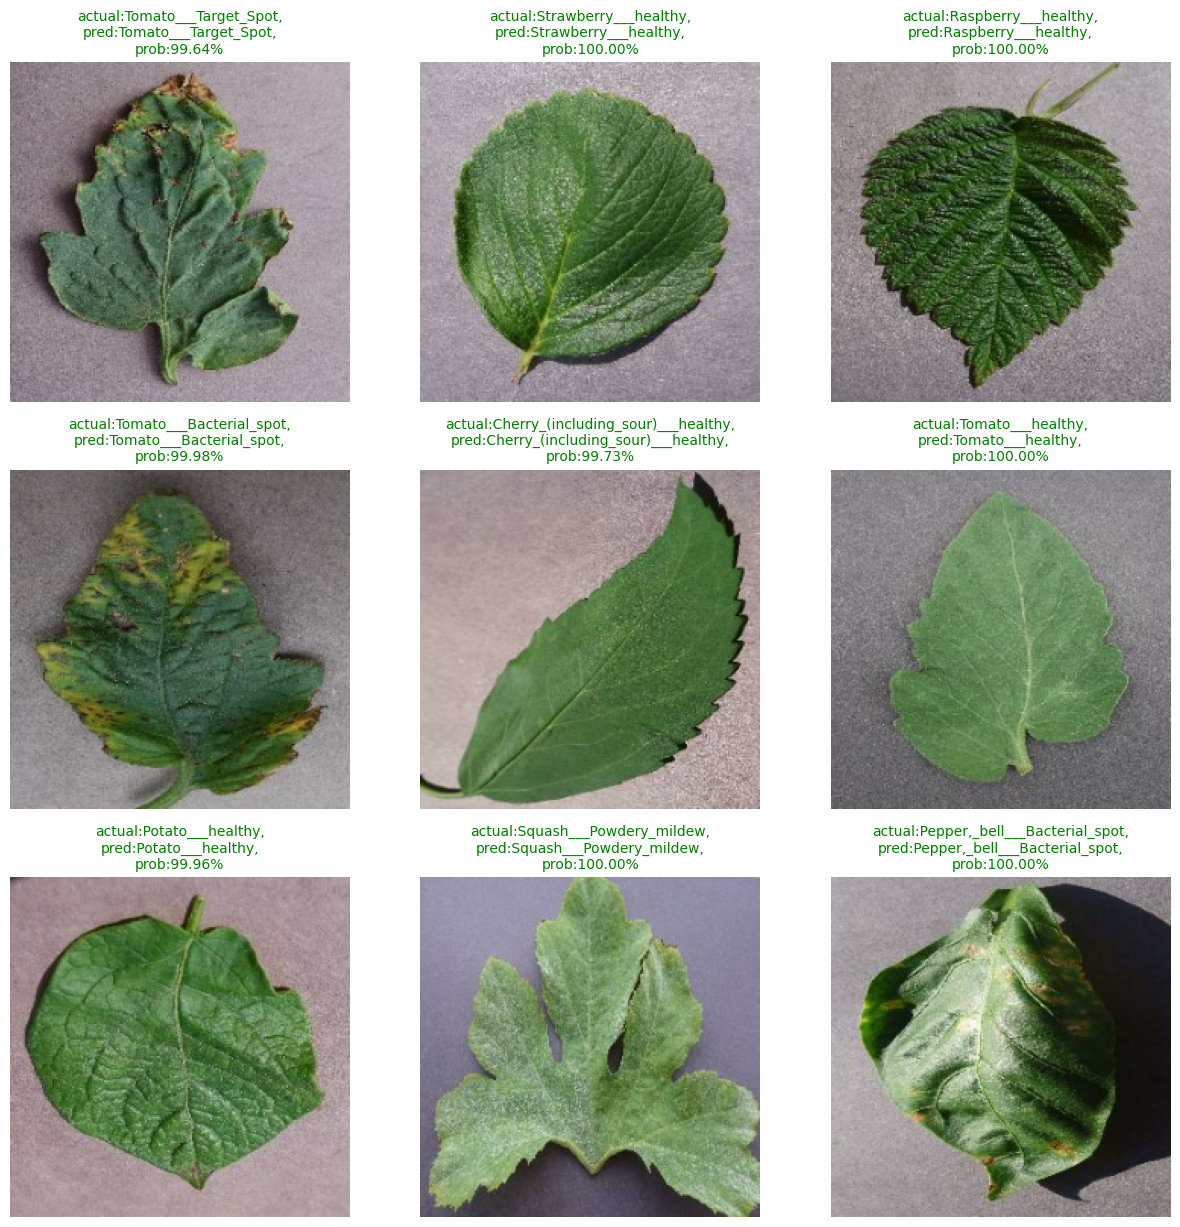

In [110]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 34ms/step


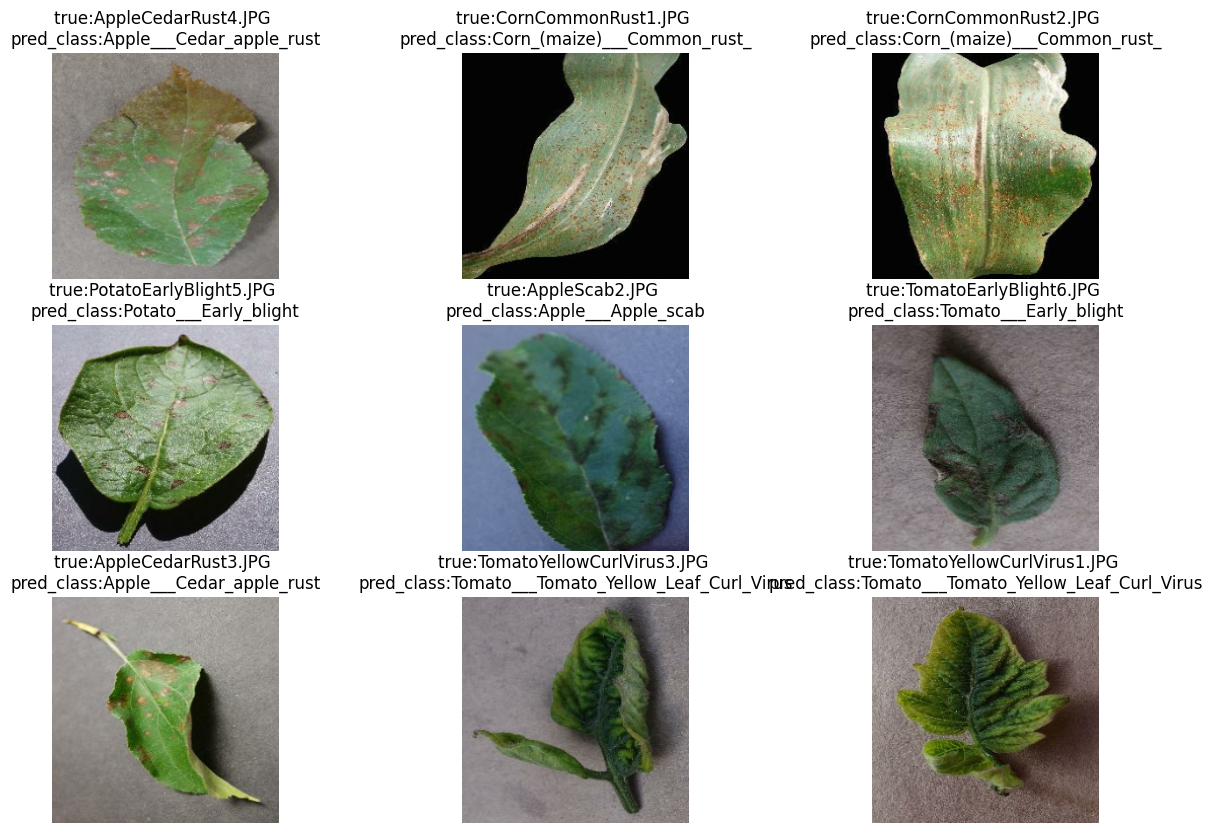

In [111]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)


## lets download some image on google

In [112]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [115]:
!wget https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg

--2023-06-24 19:24:50--  https://www.planetnatural.com/wp-content/uploads/2012/12/potato-blight.jpg
Resolving www.planetnatural.com (www.planetnatural.com)... 104.18.0.2, 104.18.1.2, 2606:4700::6812:2, ...
Connecting to www.planetnatural.com (www.planetnatural.com)|104.18.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99069 (97K) [image/jpeg]
Saving to: ‘potato-blight.jpg’

potato-blight.jpg   100%[===================>]  96.75K  --.-KB/s    in 0.005s  

2023-06-24 19:24:50 (18.4 MB/s) - ‘potato-blight.jpg’ saved [99069/99069]



1/1 [==============================] - 0s 32ms/step


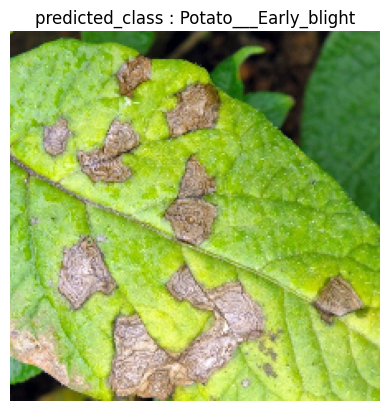

In [116]:
predict_img('potato-blight.jpg')

In [117]:
!wget https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg

--2023-06-24 19:25:02--  https://content.peat-cloud.com/w400/black-rot-of-grape-grape-1575457334.jpg
Resolving content.peat-cloud.com (content.peat-cloud.com)... 52.222.139.105, 52.222.139.122, 52.222.139.107, ...
Connecting to content.peat-cloud.com (content.peat-cloud.com)|52.222.139.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20361 (20K) [image/jpeg]
Saving to: ‘black-rot-of-grape-grape-1575457334.jpg’

black-rot-of-grape- 100%[===================>]  19.88K  --.-KB/s    in 0.006s  

2023-06-24 19:25:02 (3.04 MB/s) - ‘black-rot-of-grape-grape-1575457334.jpg’ saved [20361/20361]



1/1 [==============================] - 0s 30ms/step


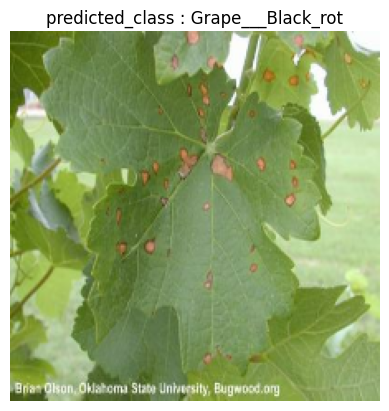

In [118]:
predict_img('black-rot-of-grape-grape-1575457334.jpg')

In [119]:
!wget https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg

--2023-06-24 19:25:15--  https://cdn.shopify.com/s/files/1/1093/4358/files/Depositphotos_160089900_l-2015_large.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28221 (28K) [image/jpeg]
Saving to: ‘Depositphotos_160089900_l-2015_large.jpg’

Depositphotos_16008 100%[===================>]  27.56K  --.-KB/s    in 0s      

2023-06-24 19:25:15 (76.5 MB/s) - ‘Depositphotos_160089900_l-2015_large.jpg’ saved [28221/28221]



1/1 [==============================] - 0s 32ms/step


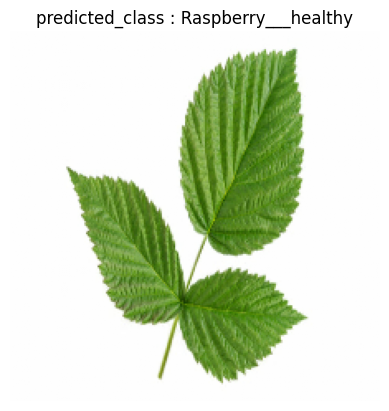

In [120]:
predict_img('Depositphotos_160089900_l-2015_large.jpg')

In [121]:
!wget https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg

--2023-06-24 19:25:31--  https://www.rosbreed.org/sites/default/files/pm%20cherry%20leaf.jpg
Resolving www.rosbreed.org (www.rosbreed.org)... 134.121.193.83
Connecting to www.rosbreed.org (www.rosbreed.org)|134.121.193.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246531 (241K) [image/jpeg]
Saving to: ‘pm cherry leaf.jpg’

pm cherry leaf.jpg  100%[===================>] 240.75K   403KB/s    in 0.6s    

2023-06-24 19:25:32 (403 KB/s) - ‘pm cherry leaf.jpg’ saved [246531/246531]



1/1 [==============================] - 0s 30ms/step


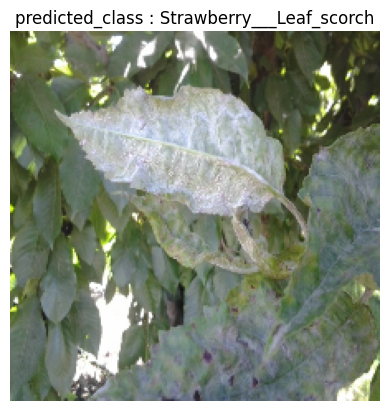

In [122]:
predict_img('pm cherry leaf.jpg')